# Tutorial 2: Dense Grid Remapping - Box2Ring

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import special
import magpie

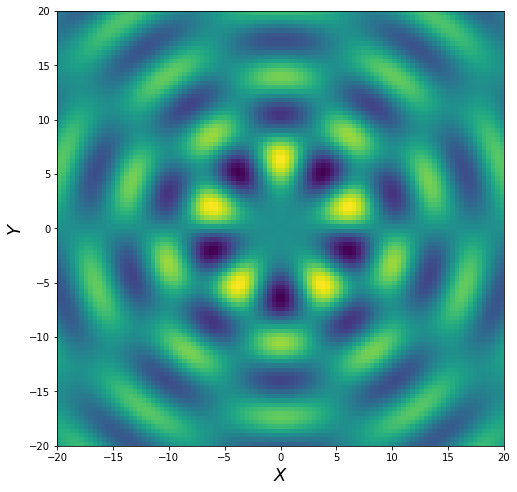

In [2]:
# Initialise magpie Box2Ring class using the dense grid remapping
b2r = magpie.dg.Box2Ring()

# Setup the box grid
b2r.setup_box(-20., 20., 100, -20., 20., 100)

# Create an 'interesting' function for remapping
# I'm using a Bessel function of order 5 multiplied by a sine wave
f = np.zeros(np.shape(b2r.x2d))
r, phi = magpie.coords.cart2polar(b2r.x2d, b2r.y2d)
f = special.jv(5, r)*np.sin(phi*5)

# Plot the initial function in a cartesian grid
plt.figure(figsize=(8, 8))
plt.imshow(f[:, ::-1], aspect='auto', origin='lower', 
           extent=[b2r.xedges[0], b2r.xedges[-1], b2r.yedges[0], b2r.yedges[-1]], cmap='viridis')
plt.xlabel(r'$X$', fontsize=18)
plt.ylabel(r'$Y$', fontsize=18)
plt.show()

In [3]:
# Construct polar grid
b2r.setup_polar(0., 20., 50, 150, center=[5., 10.], rebin_r=4, rebin_p=4)

In [4]:
# Now, let's remap the function from a linear cartesian grid to polar coordinates
f_polar = b2r.remap(f)

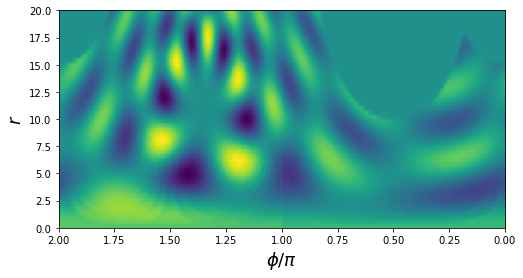

In [5]:
# Plot of the function remapped to polar coordinates
plt.figure(figsize=(8, 4))
plt.imshow(f_polar.T, aspect='auto', origin='lower', 
           extent=[b2r.pedges[0]/np.pi, b2r.pedges[-1]/np.pi, b2r.redges[0], b2r.redges[-1]], cmap='viridis')
plt.xlabel(r'$\phi/\pi$', fontsize=18)
plt.ylabel(r'$r$', fontsize=18)
plt.gca().invert_xaxis()
plt.show()

## Dense Grid vs Monte Carlo Weighted Remapping

In [6]:
# Initialise magpie Box2Ring class
b2r = magpie.mc.Box2Ring()

# Setup the box grid
b2r.setup_box(-20., 20., 100, -20., 20., 100)

In [7]:
b2r.setup_polar_lin(0., 20., 50, 150, center=[5., 10.])
# Calculate monte carlo weights for remapping
b2r.get_weights()

Calculating weights : |##################################################| 100% 


Remapping : |##################################################| 100% 


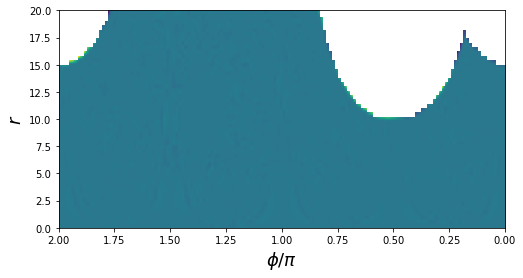

In [8]:
# Compare dense grid remapping to monte carlo remapping
f_polar2 = b2r.remap(f)

plt.figure(figsize=(8, 4))
plt.imshow((f_polar2-f_polar).T, aspect='auto', origin='lower', 
           extent=[b2r.pedges[0]/np.pi, b2r.pedges[-1]/np.pi, b2r.redges[0], b2r.redges[-1]], cmap='viridis')
plt.xlabel(r'$\phi/\pi$', fontsize=18)
plt.ylabel(r'$r$', fontsize=18)
plt.gca().invert_xaxis()
plt.show()

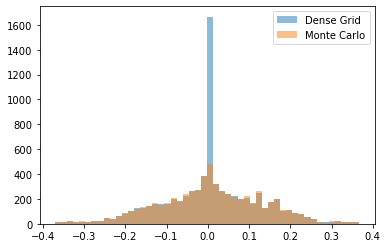

In [9]:
plt.hist(f_polar.flatten(), 50, alpha=0.5, label='Dense Grid')
plt.hist(f_polar2.flatten(), 50, alpha=0.5, label='Monte Carlo')
plt.legend(loc='best')
plt.show()